# Tutorial 2 - Python libraries NumPy and Matplotlib


*written and revised by Jozsef Arato, Mengfan Zhang, Dominik Pegler*  
Computational Cognition Course, University of Vienna  
https://github.com/univiemops/tewa1-computational-cognition
---

## This week's lab:

We will briefly introduce the Python library NumPy and Matplotlib this week. Comprehensive documentation can be found at https://numpy.org/doc/stable/user/index.html and https://matplotlib.org/stable/users/index.html. 

NumPy is one of the most important libraries for scientific computing in Python. Foundational libraries such as Matplotlib and Pandas, as well as machine learning libraries such as TensorFlow and scikit-learn, which we will discuss in future weeks, often use NumPy arrays as input. In this tutorial, we will cover array creation, indexing, slicing, mathematical operations, and commonly used functions of NumPy. 

Matplotlib is a popular 2D plotting library for Python. It provides a flexible and powerful interface for creating a wide variety of plots, charts, and visualizations. In this tutorial, we will show you how to create simple plots, customize plots, and work with multiple subplots.

**Learning goals:** \
When finishing this tutorial, you should...
*   know how to import libraries and functions  
*   perform basic array operations, calculations, and functions with NumPy 
*   understand the structure of a plot and create custom plots using Matplotlib  

**Estimated time to complete:** 1.5 hours (depends on your previous knowledge) \
**Deadline:** Next Monday, 23:59

## 1. Import library 

Last week, you already used several built-in Python functions such as `print()`,`len()`, and `type()`. However, there are not so many of them and these functions are limited. If we want to do things more complicated, we can make use of Python libraries. 

To get access to functionality of the non-built-in libraries, you need to first explicitly import them by:\
`import library` \
and usually abbreviate the library name by two or three letters: \
`import library as abbreviation` 

Then the functions can be called by: \
`library.function` or `abbreviation.function` 

If you don't need the whole library, but just the specific functions, you can import by: \
`from library import function 1, function 2, etc` \
or you can customize the import \
`from library import someFunction as newName`

## 2. NumPy 

NumPy provides arrays, a data format that makes numerical computation easier, and comes with many functions for manipulating these arrays. NumPy arrays can have any number of dimensions. A one-dimensional array is similar to a simple list, a two-dimensional array is similar to a matrix, and arrays with more than two dimensions are also commonly used. For example, fMRI data can typically be represented as 4D arrays (3 dimensions represent x,y,z axis of the brain volume + 1 dimension of time points).

Now, let's import the library and start from creating an array. 

In [2]:
import numpy as np 
# it just makes our lives easier if we all use the same abbreviation

To see how a function works, just type it after a ? mark:

In [59]:
?np.zeros 

There are many arbitrary conventions in how Python's built-in functions work, you can sometimes figure these out by trial and error, but it is often easier to use the built-in help by typing the ? in front and running the cell, or you can always Google it. 

### 2.1 Creation of numpy array 

In the below cell, we create a 1D numpy array of five zeros using the function np.zeros.

In [ ]:
my_zeros = np.zeros(5)
print(my_zeros)

Try to make an 1D array called "ar_of_ones" of 200 ones using the np.ones in the cell below.

In [ ]:
ar_of_ones = # YOUR CORE HERE


In [ ]:
'''Test the above cell ''' 
try:
    assert all(ar_of_ones) == 1 and sum(ar_of_ones) == 200
except AssertionError as msg:
    print("'ar_of_ones' is not correctly defined.")
    raise(msg)
else:
    print("Good!")

This allows us to easily create an array with the same values in it. If we want to make an array of 200 lengths with only 55, we can multiply an array of ones by 55 (or plus 54). 

In [ ]:
ar_of_fiftyfives = ar_of_ones * 55
ar_of_fiftyfives

Alternatively, we can use `np.full`.

In [ ]:
alt_to_previous = np.full(200, 55)
alt_to_previous

Another way to create a numpy array is to first define a list, and then you can convert this list to a numpy array using `np.array` function. Or you can combine these two steps to manually create a numpy array from a list of numbers.

In [ ]:
my_list = [10, -43, 45, 2, 56, 67, 76, 12, -1, 2, 55, 
           2345, 4, 345, 4, 5, 67, 7, 545, 3, 5, 3564, 24]
my_array = np.array(my_list)

# alternatively:
my_array = np.array([10, -43, 45, 2, 56, 67, 76, 12, -1, 2, 55, 
                     2345, 4, 345, 4, 5, 67, 7, 545, 3, 5, 3564, 24]
                   )

print(my_array)

A simple list is converted to 1D array, but a nested list (a list within a list) is converted to 2D or higher dimensions based on the list structure:

In [ ]:
my_2D_list = [[1, 2, 3],[4, 5, 6]]
my_2D_array = np.array(my_2D_list)

my_3D_list = [[[1, 2, 3],[4, 5, 6]],
              [[7, 8, 9],[10, 11, 12]],
              [[13, 14, 15],[16, 17, 18]]]
my_3D_array = np.array(my_3D_list)

print("A 2D array:", '\n', my_2D_array, '\n')
print("A 3D array:", '\n', my_3D_array)

As you might expecet, creating nested list and then coverting it to numpy array quickly become troublesome as the increasing of dimensions or elements. Fortunately, Numpy provides various functions to initiate high dimension arrays efficiently. The `np.zeros`, `np.ones`, and `np.empty` functions are commonly used for this purpose. Once you initialize an array with only zeros/ones of your desired dimensionality, you can fill in the array using loop or other operations. 

In [ ]:
my_dimension = (3, 2, 5) # use () for defining dimensionality, here I want a 3D array with shape of 3*2*5
my_3d_zeros = np.zeros(my_dimension)

my_3d_ones = np.ones((2, 4, 3))

print("A 3d array with zeros:", '\n', my_3d_zeros, '\n')
print("A 3d array with ones:", '\n', my_3d_ones)

*Tips:* Creating an "empty" array with only zeros/ones and filling in "actual values" latter is called **pre-allocation** in programming. When adding elements to an array, the memory is dynamically allocated. Pre-allocating an array helps avoid the overhead of dynamic memory allocation and improve efficiency.

You may also wonder why we don't do operations on the list directly? Why do we need the numpy array instead? Recall that we mentioned last week that Python's list allows different types of data as its elements. However, the numpy array contains only a single data type. This makes the numpy array memory efficient compared to the list, and Python doesn't need to check the data type of the elements when performing the operation. Also, NumPy supports broadcasting and vectorized operations (we will mention them later), which can apply operations to the entire array without looping over individual elements. As a result, operations on NumPy arrays can be much faster, and this is really important when you do complex operation. See an example below:

In [ ]:
time_list = %timeit -n 10000 [x + 1 for x in range(1000)]
time_nparray = %timeit -n 10000 np.arange(1000) + 1

### 2.2 Indexing and slicing

Indexing and slicing a 1D numpy array is very similar to indexing and slicing a simple Python list as we discussed last week. 

In the cell below, try to extract the fifth element of the "my_array" variable, and stored it in "fifth_ele". Also stored the second to the nineth elements of "my_array" to the new variable "two_to_nine_ele".

In [ ]:
my_array = np.array([10, -43, 45, 2, 56, 67, 76, 12, -1, 2, 55, 
                     2345, 4, 345, 4, 5, 67, 7, 545, 3, 5, 3564, 24]
                   )

# YOUR CODE HERE

To index a multidimensional array, you can index using an operation similar to a 1D array on each dimension, and separate each dimension indexing operation by comma. Let's see some example below:

In [ ]:
some_3D_array = np.arange(40).reshape((2, 5, 4))
print("Full array:", '\n', some_3D_array, '\n',)

print("dim1: index the second element, dim2: index the third element, dim3: index the third element")
print(some_3D_array[1, 2, 2])

print("dim1: the first element, dim2: 1-4 elements, dim3: 2-3 elements")
print(some_3D_array[0, 0:4, 1:3])

1. print the length of this array using shape
2. use numpy to print MyArray sorted from smallest to largest, (and print)
3. use numpy to print MyArray sorted from largerst to smallest (and print)
4. use numpy to find the mean of MyArray (and print)
5. use numpy to find the median of MyArray
6. use numpy to calculate the standard deviation of MyArray
7. use numpy to print the minimum and maximum value of MyArray


In [28]:
print("1.", len(my_array))
print(
    "2.",
    sorted(
        my_array,
    ),
)
print("3.", sorted(my_array, reverse=True))
print("4.", my_array.mean())
print("5.", np.median(my_array))
print("6.", np.std(my_array))
print("7.", "Min: ", np.min(my_array), "Max: ", np.max(my_array))

1. 23
2. [-43, -1, 2, 2, 3, 4, 4, 5, 5, 7, 10, 12, 24, 45, 55, 56, 67, 67, 76, 345, 545, 2345, 3564]
3. [3564, 2345, 545, 345, 76, 67, 67, 56, 55, 45, 24, 12, 10, 7, 5, 5, 4, 4, 3, 2, 2, -1, -43]
4. 313.0
5. 12.0
6. 844.1523147126842
7. Min:  -43 Max:  3564


test the np.arange function

1. use arange to print numbers 0 to 6
2. use arange to print numbers 5 to 12
3. use arange to  print all numbers between 200 and 300 in steps of 10



In [31]:
# YOUR CODE
print(np.arange(7))
print(np.arange(5, 13))
print(np.arange(200, 301, 10))

[0 1 2 3 4 5 6]
[ 5  6  7  8  9 10 11 12]
[200 210 220 230 240 250 260 270 280 290 300]


test the numpy linspace function

how is it diferent from arange?

create an array with linspace, called MyArr2 that goes between 0 and 100 in steps of 10

In [31]:
# YOUR CODE
my_array2 = np.linspace(0, 100, 10, dtype=int)
my_array2

array([  0,  11,  22,  33,  44,  55,  66,  77,  88, 100])

indexing of  numpy arrays is done with [], similarly to  lists 

1. print the 2nd, 4th elements of MyArray below

2. print all elements from 2nd to last

3. print the last five elements

In [7]:
my_array = np.random.random_sample(200)

print(my_array[1], my_array[3])
print(my_array[2:])
print(my_array[-5:])

0.13687326415064005 0.1352921037428566
[0.65984066 0.1352921  0.51158754 0.66762425 0.23340443 0.74156884
 0.32094095 0.33802513 0.77601165 0.40428091 0.38305246 0.07595329
 0.38796644 0.02363402 0.84262424 0.5320416  0.06968553 0.11848468
 0.06448533 0.58135263 0.98725306 0.48235256 0.60040773 0.63852648
 0.4192762  0.50840052 0.98377983 0.88159019 0.18420312 0.62912348
 0.80184079 0.2099824  0.25708822 0.38337994 0.2204416  0.52308366
 0.56385442 0.08768353 0.58848333 0.16410814 0.3667184  0.41257102
 0.09665405 0.82235526 0.19821888 0.68158623 0.70595609 0.8001221
 0.42411639 0.57696161 0.08541578 0.43888754 0.54815827 0.58539915
 0.89861504 0.19040119 0.19159344 0.60713951 0.65366054 0.77363112
 0.48131079 0.94045536 0.6051931  0.5164171  0.22386545 0.2214895
 0.99870567 0.2953615  0.18481304 0.09053662 0.73672742 0.444672
 0.23599599 0.56602885 0.7429699  0.72070843 0.43390175 0.58986818
 0.04319582 0.69416451 0.50476246 0.42588445 0.54900295 0.90000025
 0.0044082  0.78023182 0.22

apart from numbers, a numerical numpy array can to handle missing values with using np.NAN

In [28]:
a = np.array([10, 21, 33, 4, 0, 7])
b = np.array([10, 21, 33, 4, np.NaN, 7])
b_without_missing = b[~np.isnan(b)]

In [28]:
print(a)
print(b)
print(np.mean(b_without_missing))
print(np.nanmean(b))

[10 21 33  4  0  7]
[10. 21. 33.  4. nan  7.]
15.0
15.0


however, missing values change the calculations on arrays

test np.mean, np.nanmean on A and B

you can easily see that using zeros for missing values is dangerous!

---



In [ ]:
print(# your code here)
print(# your code here)
print(# your code here)
print(# your code here)

numpy array are very useful, as we can make quick calculations on all if its elements

In [ ]:
np.sum(my_array)

7199

the above simply sums all elements of MyArray.

However, if we do:

In [ ]:
print(my_array)
np.sum(my_array > 0)

[  10  -43   45    2   56   67   76   12   -1    2   55 2345    4  345
    4    5   67    7  545    3    5 3564   24]


21

In [ ]:
my_array > 0

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

try to understand what the above code is doing


the 4 logicals we use for such calculations
are >,<,==,!=  

test what these might be doing below

1. calculate how many elements of  MyArray equal 2

2. calculate how many elements of  MyArray are not equal 2



In [ ]:
Num2=#YOUR CODE
NumNot2=#YOUR CODE

print('Num equal two:',Num2)
print('Num not equal two:',NumNot2)

Num equal two: 2
Num not equal two: 21


## Data visualization with Matplotlib

data visualization is really important for science communication

it is also very useful to see what the code is doing, to visualize different steps of an analysis with plot, many coding mistakes can be avoided this way

the standard data visualization library in python is matplotlib
we usually import it as below: 


In [32]:
from matplotlib import pyplot as plt

for example we can plot the array we created above

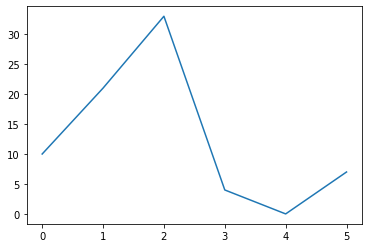

In [35]:
plt.plot(a)


a different type of plot can be accessed as plt.scatter

X is defined a the numbers 0:5 as below.

1. create a new array Y that is defined as the values of X squared 
2. and make a scatter plot of the result


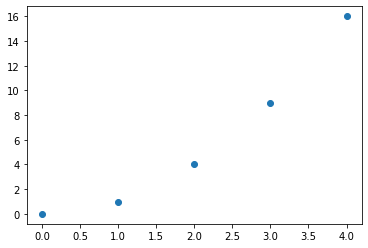

In [37]:
x = np.arange(5)
y = x**2
plt.scatter(
    x,
    y,
)
# yOUR CODE

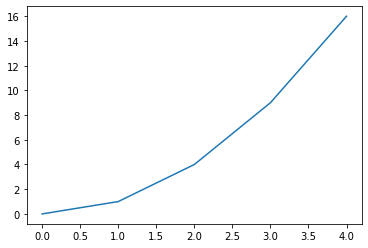

In [38]:
plt.plot(x, y)

we return to our list of animals,
with defining an additional feature (life expectancy), and we transform these into nupmy arrays

In [ ]:
animals = np.array(["Dog", "Cat", "Elephant", "Horse", "Rat", "Mouse"])
weights = np.array([20, 2, 3e6, 500, 0.3, 0.02])  # kg
life_exp = np.array([12, 16, 70, 25, 2, 0.1])  # years
print(animals)
print(life_exp)

['Dog' 'Cat' 'Elephant' 'Horse' 'Rat' 'Mouse']
[12.  16.  70.  25.   2.   0.1]


this is very useful way of indexing:

In [ ]:
print("animals that live more than 15 years", animals[life_exp > 15])
# to understand how this works, check
print(life_exp > 15)

Animals that live more than 15 years ['Cat' 'Elephant' 'Horse']
[False  True  True  True False False]


plot the weigth of each animals

 please see the below code below for some of the basic visualization features of matplotlib

Text(0.5, 0, 'Animal Species')

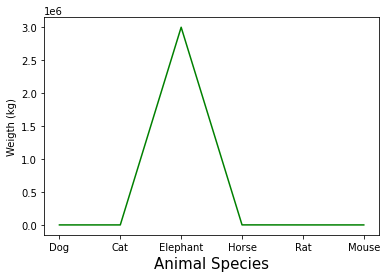

In [ ]:
plt.figure()  # normally we add this, if we start a new figure
plt.plot(weights, color="g")
plt.xticks(np.arange(6), animals)
plt.ylabel("Weigth (kg)")
plt.xlabel("Animal Species", fontsize=15)

the above figure is not very informative, lets make it more interesting,

1. recreate the same plot, but with weigth on the log scale
2. increase fontsize
3. add markers for each animal, not only a continuous line 


Text(0.5, 0, 'Animal Species')

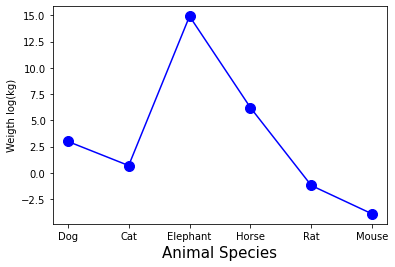

In [ ]:
plt.figure()  # normally we add this, if we start a new figure
plt.plot(np.log(weights), color="b", marker="o", markersize=10)
plt.xticks(np.arange(6), animals)
plt.ylabel("Weight log(kg)")
plt.xlabel("Animal Species", fontsize=15)


1. make a scatter plot, where you plot the weight on the X and the life expectany on the Y  (plt.scatter)
2. add animal names using plt.text for each dot, so that we can see which animal is which dot.  (hint: a for cycle will make this easier )
3. make the plot nicer, by adding x & y labels, increasing fontsize, markersize, changing colors.
4. add a dot on the same figure, that shows the average weigth vs the average life expectancy (this dot should be bigger than the rest).
5. redo the same figure, with weight on the log scale





i=  0
i=  1
i=  2
i=  3
i=  4
i=  5


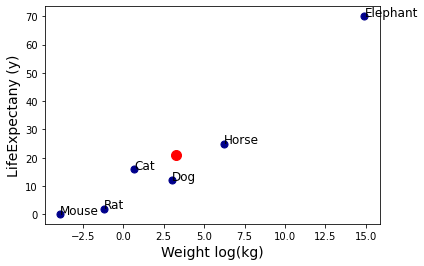

In [ ]:
plt.figure()
# YOUR CODE
# YOUR CODE
# YOUR CODE
# YOUR CODE

In [ ]:
?plt.text

## Multidimensional arrays

until now, we looked at 1 dimensional numpy arrays, however numpy arrays can have any number of dimensions

2d arrays (with rows and columns) is also called a matrix

we can easily create a matrix of zeros with the zeros function as below

In [ ]:
xx = np.zeros((5, 3))
print(xx)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


**we** can also create a 2d array "manually"

In [ ]:
xx2 = np.array([[1, 20, 6], [40, 5, 70], [55, 23, 12]])
print(xx2)

[[ 1 20  6]
 [40  5 70]
 [55 23 12]]


one of the most important things for us , is to learn how to select parts of such a 2d matrix

1. modify XX matrix, such that the first row is only 2-s. (call the result XXmod)

2. modifiy XX matrix such that the first column is only 2-s.

3. modify  XX matrix such that elements along the diagonal are equal to 5

4. modify XX matrix that elements on the diagonal such that  (1row 1st column = 1 , 2nd row, 2nd column=2, 3rd row, 3rd column = 3 etc). 
Don't set this manually one by one, but try to find other solutions, that would scale to much bigger matrices.



In [ ]:
XXmod=XX[:] #YOUR CODE
XXmod[0,:]=2
print('First Row 2-s',XXmod)
# YOUR CODE
XXmod=# YOUR CODE
print('First Column 2-s',# YOUR CODE)
# YOUR CODE
# YOUR CODE
# YOUR CODE

explore what np.shape is doing with a 2d array (matrix),

this will be useful for working with matrcies where we do not know the dimensions in advance (which is almost always the case, if we try to write general code).

In [ ]:
# YOUR CODE
# YOUR CODE

make a 2d array (10 by 10), that contains all numbers 1-100 in ascending order

In [ ]:
# YOUR CODE
# YOUR CODE

From the matrix above you created above , calculate the average of each row and each columun using np.mean 


In [ ]:
# YOUR CODE

it is good practive to do it with a for cycle, but in fact we do not need it!